In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
X_train = pd.read_csv('../data/X_train_transformed_v2.csv')
X_test = pd.read_csv('../data/X_test_transformed_v2.csv')
y_train = pd.read_csv('../data/y_train_v2.csv')
y_test = pd.read_csv('../data/y_test_v2.csv')

In [3]:
# Normalize the target labels for XGBoost
y_train_normalized = y_train - 1
y_test_normalized = y_test - 1

### RANDOM FOREST CLASSIFIER ###

In [4]:
# parameter tuning
rf_params = {
    'n_estimators': [150, 350, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', verbose=1)
rf_grid.fit(X_train, y_train_normalized)

rf_best_model = rf_grid.best_estimator_
rf_best_params = rf_grid.best_params_
rf_accuracy = cross_val_score(rf_best_model, X_test, y_test_normalized, cv=5, scoring='accuracy')

rf_results = {
    'Best Parameters': rf_best_params,
    'Mean Accuracy': np.mean(rf_accuracy),
    'Std Accuracy': np.std(rf_accuracy),
    'Individual Accuracy Scores': rf_accuracy.tolist()
}

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/ahmadzaki/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ahmadzaki/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ahmadzaki/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ahmadzaki/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

In [5]:
# XGBoost parameter tuning
xgb_params = {
    'n_estimators': [150, 350, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb_model = XGBClassifier(
    tree_method='gpu_hist',  
    random_state=42,
    eval_metric='logloss'
)

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy', verbose=1)
xgb_grid.fit(X_train, y_train_normalized)

xgb_best_model = xgb_grid.best_estimator_
xgb_best_params = xgb_grid.best_params_
xgb_accuracy = cross_val_score(xgb_best_model, X_test, y_test_normalized, cv=5, scoring='accuracy')

xgb_results = {
    'Best Parameters': xgb_best_params,
    'Mean Accuracy': np.mean(xgb_accuracy),
    'Std Accuracy': np.std(xgb_accuracy),
    'Individual Accuracy Scores': xgb_accuracy.tolist(),
}

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/home/ahmadzaki/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:11:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/ahmadzaki/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:11:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/ahmadzaki/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:11:39] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running 

In [6]:
rf_results, xgb_results

({'Best Parameters': {'max_depth': 30,
   'min_samples_split': 5,
   'n_estimators': 500},
  'Mean Accuracy': 0.4151573038088183,
  'Std Accuracy': 0.024626015728626816,
  'Individual Accuracy Scores': [0.40969162995594716,
   0.46255506607929514,
   0.3938053097345133,
   0.41150442477876104,
   0.39823008849557523]},
 {'Best Parameters': {'learning_rate': 0.05,
   'max_depth': 8,
   'n_estimators': 350},
  'Mean Accuracy': 0.39217964211921563,
  'Std Accuracy': 0.029864456375127458,
  'Individual Accuracy Scores': [0.3876651982378855,
   0.44933920704845814,
   0.37610619469026546,
   0.36283185840707965,
   0.38495575221238937]})

In [7]:
print("Random Forest Results:", rf_results)
print("\nXGBoost Results:", xgb_results)

Random Forest Results: {'Best Parameters': {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 500}, 'Mean Accuracy': 0.4151573038088183, 'Std Accuracy': 0.024626015728626816, 'Individual Accuracy Scores': [0.40969162995594716, 0.46255506607929514, 0.3938053097345133, 0.41150442477876104, 0.39823008849557523]}

XGBoost Results: {'Best Parameters': {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 350}, 'Mean Accuracy': 0.39217964211921563, 'Std Accuracy': 0.029864456375127458, 'Individual Accuracy Scores': [0.3876651982378855, 0.44933920704845814, 0.37610619469026546, 0.36283185840707965, 0.38495575221238937]}


In [8]:
rf_results_table = pd.DataFrame([{
    "Model": "Random Forest",
    "Best Parameters": rf_results['Best Parameters'],
    "Mean Accuracy": rf_results['Mean Accuracy'],
    "Std Accuracy": rf_results['Std Accuracy'],
    "Individual Accuracy Scores": rf_results['Individual Accuracy Scores']
}])

xgb_results_table = pd.DataFrame([{
    "Model": "XGBoost",
    "Best Parameters": xgb_results['Best Parameters'],
    "Mean Accuracy": xgb_results['Mean Accuracy'],
    "Std Accuracy": xgb_results['Std Accuracy'],
    "Individual Accuracy Scores": xgb_results['Individual Accuracy Scores']
}])

combined_results_table = pd.concat([rf_results_table, xgb_results_table], ignore_index=True)
combined_results_table


,Model,Best Parameters,Mean Accuracy,Std Accuracy,Individual Accuracy Scores
0,Random Forest,"{'max_depth': 30, 'min_samples_split': 5, 'n_e...",0.415157,0.024626,"[0.40969162995594716, 0.46255506607929514, 0.3..."
1,XGBoost,"{'learning_rate': 0.05, 'max_depth': 8, 'n_est...",0.392180,0.029864,"[0.3876651982378855, 0.44933920704845814, 0.37..."


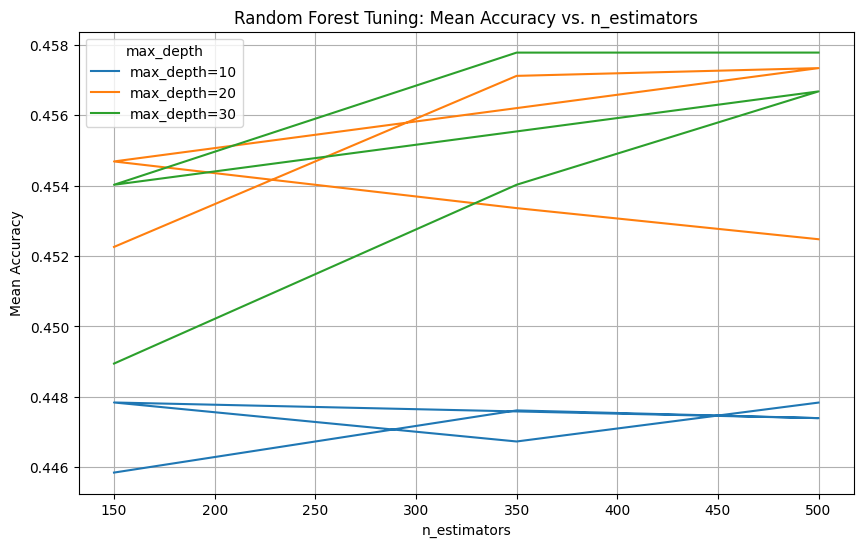

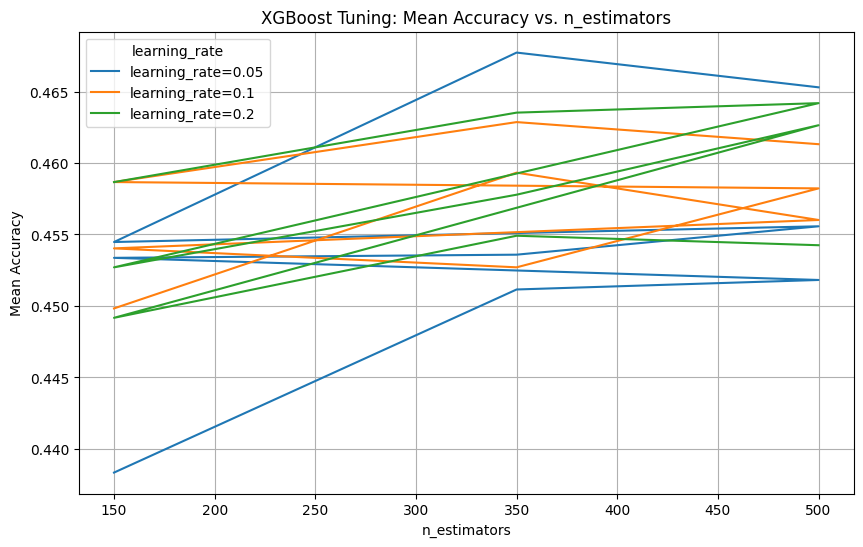

In [12]:
import matplotlib.pyplot as plt

rf_tuning_results = pd.DataFrame(rf_grid.cv_results_)
xgb_tuning_results = pd.DataFrame(xgb_grid.cv_results_)

# Plot Random Forest results
plt.figure(figsize=(10, 6))
for depth in rf_params['max_depth']:
    subset = rf_tuning_results[rf_tuning_results['param_max_depth'] == depth]
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f"max_depth={depth}")
plt.title("Random Forest Tuning: Mean Accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Mean Accuracy")
plt.legend(title="max_depth")
plt.grid()
plt.show()

# Plot XGBoost results
plt.figure(figsize=(10, 6))
for rate in xgb_params['learning_rate']:
    subset = xgb_tuning_results[xgb_tuning_results['param_learning_rate'] == rate]
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f"learning_rate={rate}")
plt.title("XGBoost Tuning: Mean Accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Mean Accuracy")
plt.legend(title="learning_rate")
plt.grid()
plt.show()


In [9]:
combined_results_table.to_csv("../data/model_tuning_results_v2.csv", index=False)